In [137]:
import sklearn
from sklearn.cluster import KMeans,MiniBatchKMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score,make_scorer
from ConstructDatatset import *
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from TotalCalculation import *
from preprocessing import *
from ClassPrediction import *

In [138]:
df = Builddataset().concateDataset(folder_name = r'C:\Users\ASUS\Documents\NARIT_internship_data\CSV_dataset_sobel')

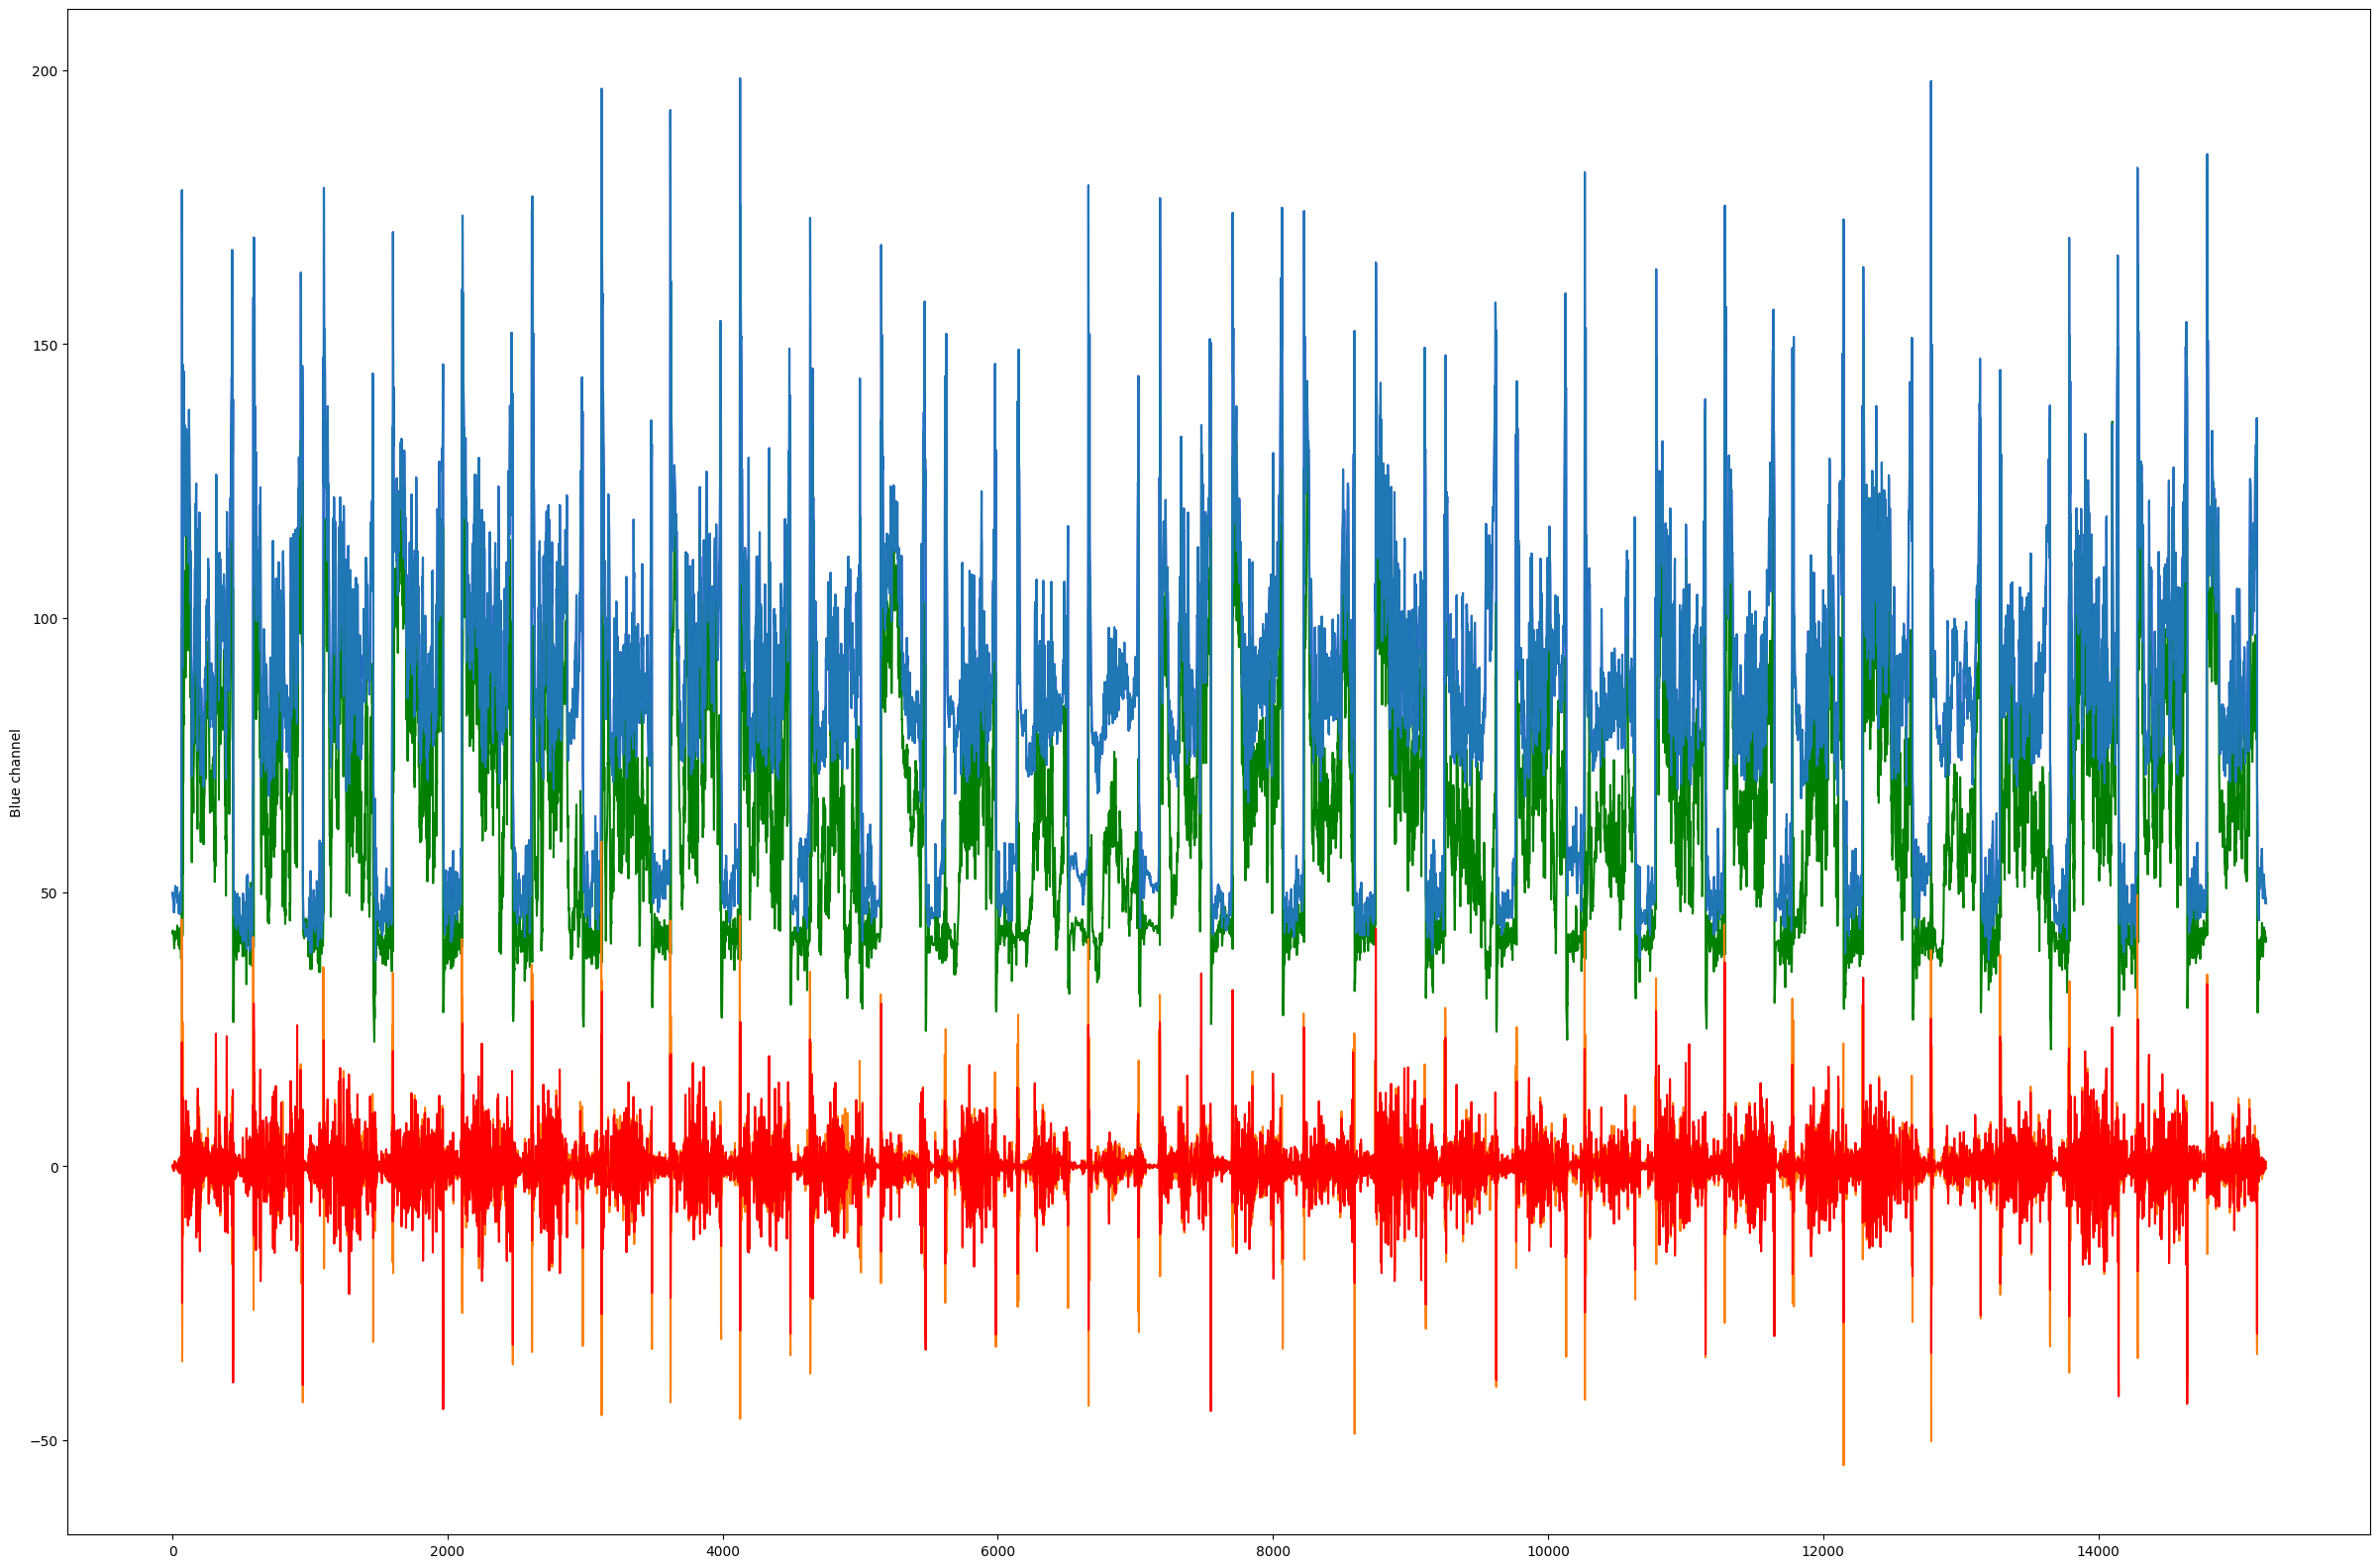

In [139]:
name_y = str('Blue channel')
name_x = np.arange(len(df))
dintr = np.gradient(df['Blue channel'])
dintb = np.gradient(df['Red channel'])

plt.figure(figsize=(30,20))
sns.lineplot(data=df,x=name_x,y=df[name_y],c='blue')
sns.lineplot(data=df,x=name_x,y=df['Red channel'],c='green')
sns.lineplot(data=df,x=name_x,y=df['intensity'])
plt.plot(dintr)
plt.plot(dintb,c='r')

In [140]:
date = []
for i in df.index.tolist():
    date.append(timeConvertion().ticks_to_datetime(i,time_zone=7))
df['Time'] = date


In [141]:
df

,contrast,dissimilarity,homogeneity,energy,correlation,ASM,intensity,Red channel,Blue channel,Time
638535492699849769,182.644248,8.253488,0.296243,0.155621,0.302766,0.024218,49.844776,42.533473,49.844776,2024-06-10 00:01:09.984976
638535495400863156,177.418604,8.128029,0.295367,0.155857,0.291972,0.024292,49.515653,42.524984,49.515653,2024-06-10 00:05:40.086312
638535498101118114,172.570301,7.999944,0.297895,0.156138,0.286672,0.024379,49.678596,42.808522,49.678596,2024-06-10 00:10:10.111808
638535500802236939,167.678650,7.952937,0.294305,0.155729,0.296515,0.024252,49.634022,42.999139,49.634022,2024-06-10 00:14:40.223696
638535503503393398,175.122577,8.045958,0.295461,0.156660,0.279383,0.024542,49.324516,42.873223,49.324516,2024-06-10 00:19:10.339336
...,...,...,...,...,...,...,...,...,...,...
638535479097020744,178.607004,8.104670,0.298231,0.157424,0.330131,0.024782,49.040997,41.977511,49.040997,2024-06-09 23:38:29.702072
638535481797955279,176.443275,8.014845,0.300439,0.156972,0.318213,0.024640,48.821436,41.854389,48.821436,2024-06-09 23:42:59.795528
638535484498354587,192.041893,8.374859,0.296456,0.157721,0.280811,0.024876,48.218843,41.237167,48.218843,2024-06-09 23:47:29.835456
638535487198661841,195.446704,8.485902,0.296255,0.155657,0.288805,0.024229,47.916085,40.872375,47.916085,2024-06-09 23:51:59.866184


In [142]:
df['Time (decimal)'] = df['Time'].dt.hour+df['Time'].dt.minute/60

In [143]:
start_date = '2024-01-01'
end_date = str(df['Time'].tolist()[1])
location = [18.849417,98.9538]
days = timeConvertion().time_duration(start_date,end_date,include_end_date=True).days

LSTM = SunPosition.LSTM(time_zone_offset=7)
EoT = SunPosition.calculate_EoT(day=days)
TC = SunPosition.TimeCorrectionFactor(Longitude=location[1],LSTM=LSTM,EoT=EoT)
dec = SunPosition.declination(day=days)
suntime = SunPosition.DaytimeInfo(latitude=location[0],declination=dec,TC=TC)
sunrise,sunset = SunPosition.DaytimeInfo(latitude=location[0],declination=dec,TC=TC)

In [144]:
df = df[(df['Time (decimal)'] > sunrise) & (df['Time (decimal)'] < sunset)]

In [145]:
x = df.drop(columns=['Time (decimal)','Time','Red channel','Blue channel','intensity','correlation'])

dataset = list(x.itertuples(index=False,name=None))
dataset = np.array(dataset)

In [146]:
df.head(10)

,contrast,dissimilarity,homogeneity,energy,correlation,ASM,intensity,Red channel,Blue channel,Time,Time (decimal)
638535703952838218,455.999679,11.635344,0.338896,0.240967,0.105255,0.058065,134.434084,84.809747,134.434084,2024-06-10 05:53:15.283824,5.883333
638535705153481533,460.192010,12.256472,0.298693,0.204750,0.125686,0.041923,134.293908,88.286205,134.293908,2024-06-10 05:55:15.348152,5.916667
638535706354006269,475.774907,12.554853,0.275951,0.176461,0.141546,0.031138,131.054376,91.762836,131.054376,2024-06-10 05:57:15.400624,5.950000
638535707554290911,478.287060,12.731876,0.271165,0.173564,0.136128,0.030124,131.040390,94.716478,131.040390,2024-06-10 05:59:15.429088,5.983333
638535708755301005,489.513698,12.905153,0.269076,0.172166,0.118886,0.029641,131.618671,98.074513,131.618671,2024-06-10 06:01:15.530104,6.016667
638535709955918738,454.084868,12.618695,0.263307,0.168125,0.124411,0.028266,133.423190,101.579984,133.423190,2024-06-10 06:03:15.591872,6.050000
638535711156607934,550.760793,13.204868,0.255928,0.154808,0.083266,0.023965,135.195728,104.915084,135.195728,2024-06-10 06:05:15.660792,6.083333
638535712357069730,551.478821,13.009783,0.262614,0.154889,0.092769,0.023990,131.676267,104.058850,131.676267,2024-06-10 06:07:15.706976,6.116667
638535713557852593,461.133354,12.667037,0.260202,0.157328,0.158879,0.024752,133.158122,107.004357,133.158122,2024-06-10 06:09:15.785256,6.150000
638535714758284812,493.145825,13.210071,0.258692,0.165955,0.170268,0.027541,132.970439,108.609207,132.970439,2024-06-10 06:11:15.828480,6.183333


<Axes: >

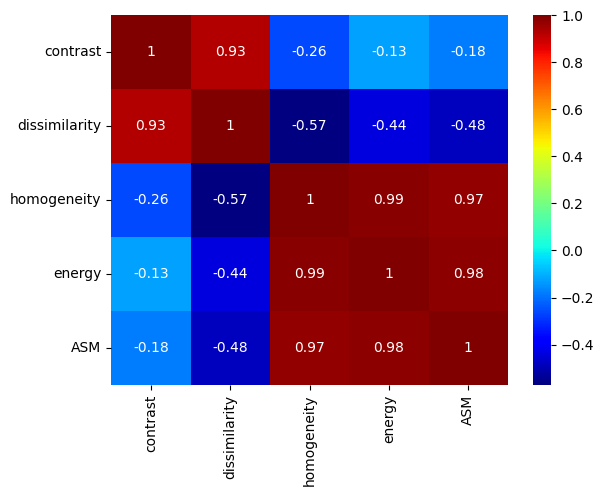

In [147]:
sns.heatmap(data=x.corr(),cmap='jet',annot=True)

In [148]:
from sklearn.metrics.pairwise import euclidean_distances
np.random.seed(42)

kmeans = KMeans(init='k-means++', n_clusters=7, n_init='auto', random_state=42, tol=1e-04,algorithm='lloyd')
minik = MiniBatchKMeans(n_clusters=7,batch_size=1500, max_no_improvement=30, tol=1e-4, random_state=42, init='k-means++' ,n_init='auto', max_iter=500 ,reassignment_ratio=0.001)
#af = AffinityPropagation(damping=0.95, max_iter=500, convergence_iter=20, preference=-50, affinity='euclidean')
GMM = GaussianMixture(n_components=7, tol=1e-4, init_params='kmeans',covariance_type='full', max_iter=500, random_state=42, n_init=10)
labels = GMM.fit_predict(dataset)
labels_kmean = kmeans.fit_predict(dataset)
labels_minik = minik.fit_predict(dataset)
#labels_af = af.fit_predict(dataset)

In [149]:
#df.loc[:, 'Label_GMM'] = labels
#df.loc[:, 'Label_Kmean'] = labels_kmean
#df.loc[:, 'Label_AF'] = labels_af

<Axes: xlabel='dissimilarity', ylabel='homogeneity'>

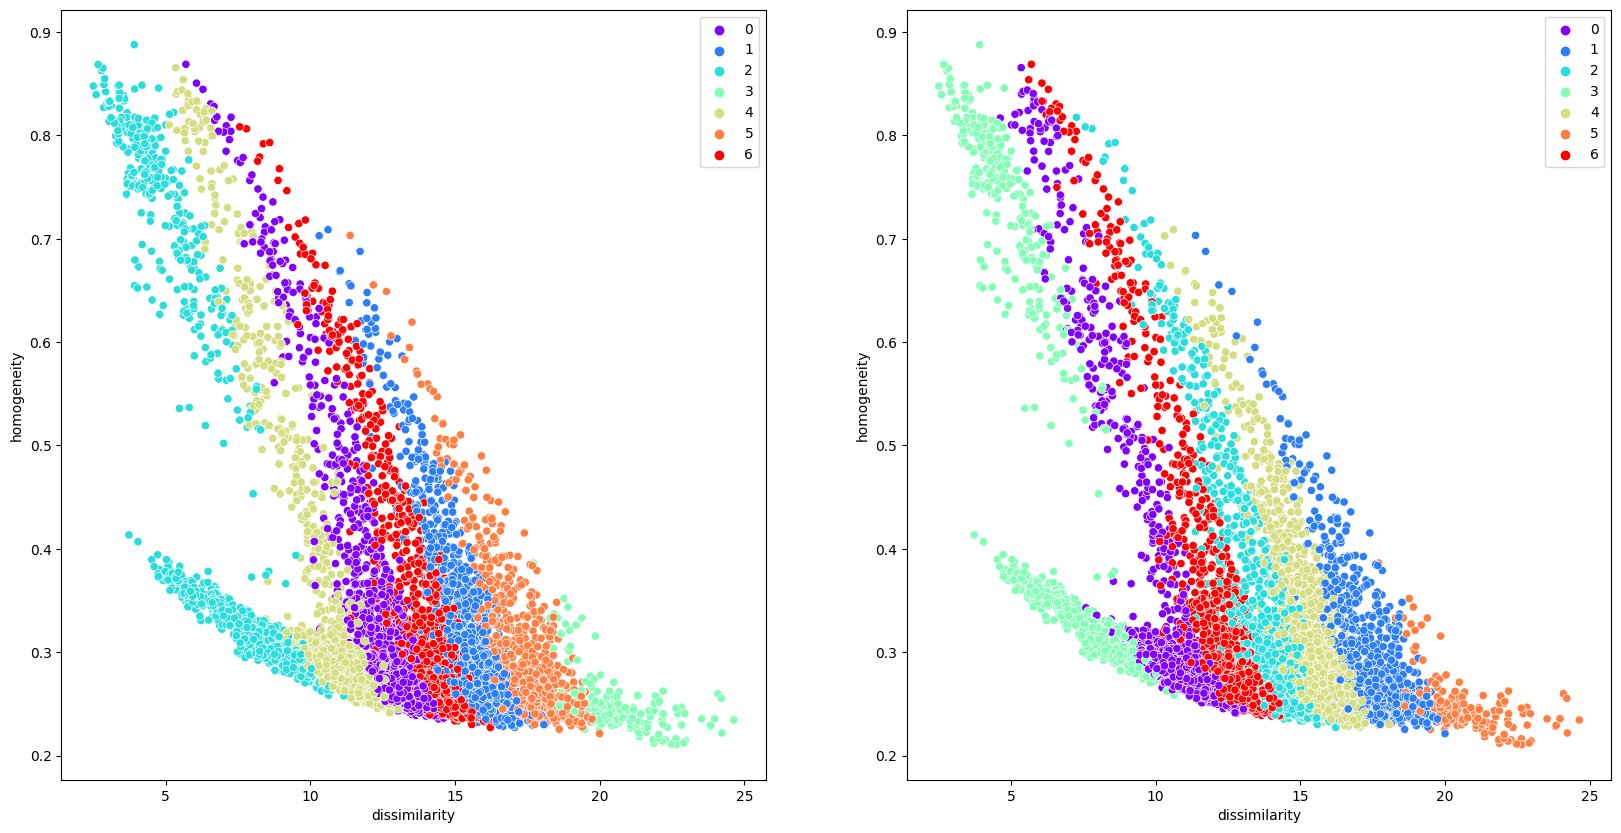

In [150]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.scatterplot(data=df,x=df['dissimilarity'],y=df['homogeneity'],hue=labels_minik,palette='rainbow')
plt.subplot(1,2,2)
sns.scatterplot(data=df,x=df['dissimilarity'],y=df['homogeneity'],hue=labels_kmean,palette='rainbow')

In [151]:
print(silhouette_score(dataset,labels_kmean))
print(silhouette_score(dataset,labels_minik))

0.5309163409563459
0.5291874460216728


from sklearn.model_selection import GridSearchCV

def silhouette_scorer(estimator, X):
    cluster_labels = estimator.fit_predict(X)
    return silhouette_score(X, cluster_labels)
# Example adjustment for KMeans
param_grid_kmeans = {
    'tol' : [1e-4,1e-5,1e-6],
    'n_clusters': [5, 7, 9, 11],
    'init': ['k-means++', 'random'],
    'n_init': [10, 20, 'auto'],
    'max_iter': [300, 500, 700],
    'algorithm': ['lloyd', 'elkan']
}
grid_search_kmeans = GridSearchCV(KMeans(random_state=42), param_grid_kmeans, cv=5, scoring=silhouette_scorer)
grid_search_kmeans.fit(dataset)  # X is your data

best_kmeans = grid_search_kmeans.best_estimator_

#print(best_kmeans)
#KMeans(init='random', n_clusters=11, n_init=20, random_state=42, tol=1e-06)

import pickle 

with open('af_model_1.pkl','wb') as f:
    pickle.dump(af,f)

import pickle
with open('gmm_model_3.pkl', 'wb') as f:
    pickle.dump(GMM, f)
with open('kmean_model_3.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

from preprocessing import image
image_list = image.getFilename(r'C:\Users\ASUS\Documents\NARIT_internship_data\Test_folder')

filetime = []
for file in image_list:
    filetime.append(int(os.path.splitext(os.path.basename(file))[0]))


viz = visualizer()
number = 1
source_folder = r'All_sky_camera_Astropark_Chaingmai\2024-06\2024-06-12'
destination_folder = r'C:\Users\ASUS\Documents\NARIT_internship_2024\Tester'

viz.copy_matching_files(df=viz.match_label(df=df,number=number), source_folder=source_folder, destination_folder=destination_folder)

pred = prediction()
path = r'All_sky_camera_Astropark_Chaingmai\2024-06\2024-06-09\638534868144584540.png'
pred_1,pred_2,cloud_percentage,sky_status,final = pred.total_prediction(image_path=path,mask_path='mask_delete_5.png',crop_size=570,kmeans=kmeans,GMM=GMM,df=df)

mask = cv2.imread('mask_delete_5.png',cv2.IMREAD_GRAYSCALE)
mask = crop_center(img=mask,crop_size=570)
img,name = load_single_image(path=path,crop_size=570,mask=mask,apply_crop_sun=False)
image,value,RB = pred.RBsingle(input=img,dataframe=df)
cloud_ratio = pred.CloudRatio(image=img,mask=mask)

import requests
import cv2
import numpy as np
import hashlib
import time

def get_image_hash(image_data):
    return hashlib.md5(image_data).hexdigest()

image_url = "http://weather.narit.or.th/images/allskyimage/ASTROPARK/2024-08-19"
previous_hash = None

while True:
    # Fetch the image from the web
    response = requests.get(image_url)
    if response.status_code == 200:
        # Get the current hash of the image
        current_hash = get_image_hash(response.content)
        
        # Compare with the previous hash
        if current_hash != previous_hash:
            # The image has changed
            print("Image has changed, updating display...")
            image_array = np.frombuffer(response.content, np.uint8)
            image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
            cv2.imshow('Auto-Updated Image', image)
            
            # Update the previous hash
            previous_hash = current_hash
            
            # Wait for 1 second to avoid rapid flickering
            if cv2.waitKey(1000) & 0xFF == ord('q'):
                break
        else:
            print("No change detected.")
    
    # Check every 10 seconds for a change
    time.sleep(10)
    cv2.destroyAllWindows()
